In [1]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=49956d3fccff6f2ee178b632f3c7e3984a3c44662980587de8f19bae2dcc9d82
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [2]:
import pandas as pd
from autocorrect import Speller
from arrow import now

time_start = now()
checker = Speller(lang='en')

def score(arg: str, speller: Speller) -> float:
    result = 0
    result += 0.33 if len(arg) < 1798 else 0
    result += 0.33 if len(arg.split()) < 290 else 0
    result += 0.34 if arg == speller.autocorrect_sentence(sentence=arg) else 0
    return result

train_df = pd.read_csv(filepath_or_buffer='/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
print('loaded training data')
train_df['score'] = train_df['text'].apply(func=score, args=(checker,))

print('scoring complete in {}'.format(now() - time_start))

train_df.head()

loaded training data
scoring complete in 0:33:15.353503


,id,prompt_id,text,generated,score
0,0059830c,0,Cars. Cars have been around since they became ...,0,0.0
1,005db917,0,Transportation is a large necessity in most co...,0,0.0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,0.0
3,00940276,0,How often do you ride in a car? Do you drive a...,0,0.0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,0.0


In [3]:
from plotly.express import imshow
imshow(img=train_df[['generated', 'score']].corr())

In [4]:
from plotly.express import strip
strip(data_frame=train_df, x='generated', y='score')

In [5]:
train_df['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [6]:
train_df['score'].value_counts()

score
0.00    1329
0.34      31
0.33      11
0.66       4
1.00       3
Name: count, dtype: int64

In [7]:
train_df['prompt_id'].value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

In [8]:
train_df[train_df['generated'] == 1]

,id,prompt_id,text,generated,score
704,82131f68,1,"This essay will analyze, discuss and prove one...",1,1.00
740,86fe4f18,1,I strongly believe that the Electoral College ...,1,1.00
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1,0.66


(-0.5, 1199.5, 1199.5, -0.5)

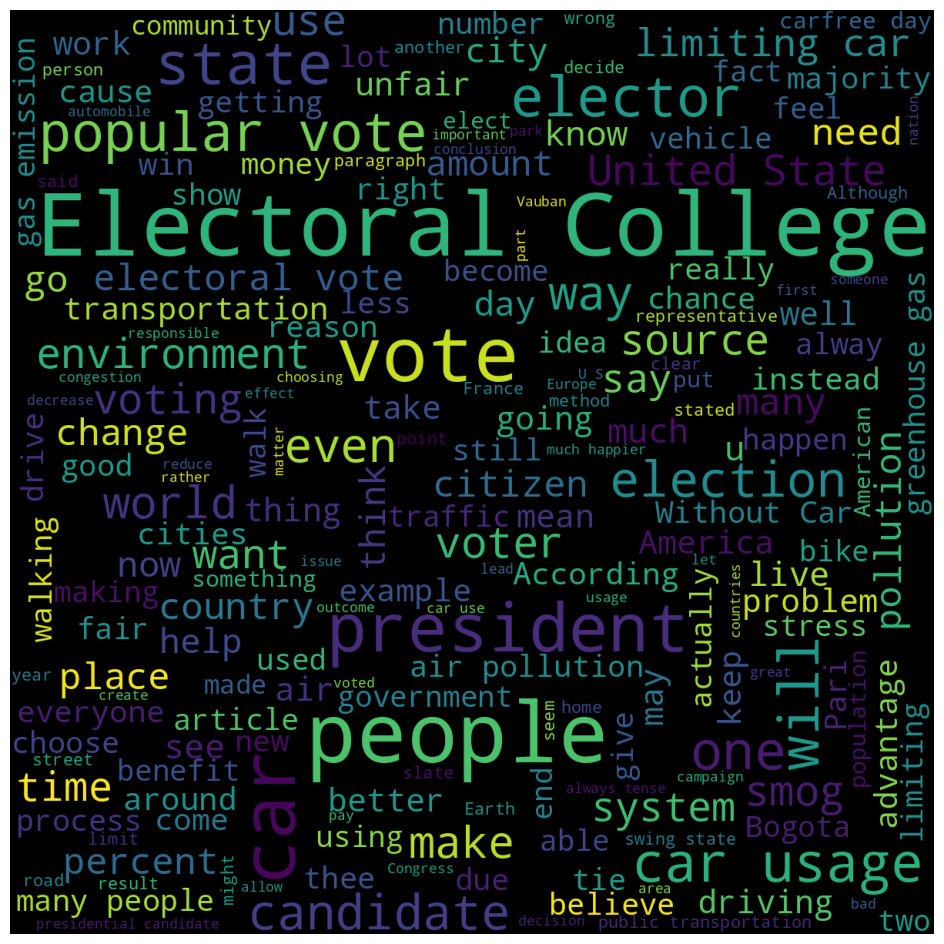

In [9]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(train_df['text'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

In [10]:
train_df.shape

(1378, 5)